# Stacked Area
This graph shows the total number of students entering primary school from 2014 to 2017 broken down by continent.

### SetUp

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# helper function
def assign_continent(country_code):
    """given a 3 letter country code,
    return the continent the country belongs to"""
    try:
        row = country_to_continent[country_to_continent.Three_Letter_Country_Code == country_code]
        continent = row.Continent_Name.values[0]
        return continent
    except:
        return None

### Pre-Processing
1. Filter Columns
2. Rename Columns
3. Assign each continennt to each country
4. Filter out the non-country level rows
5. Pivot

In [3]:
# read in data
entry = pd.read_csv('../data/entry_to_primary_edu.csv')
country_to_continent = pd.read_csv('../data/country_continent.csv')

# 1. filter
country_to_continent = country_to_continent[['Three_Letter_Country_Code', 'Continent_Name', 'Country_Name']]
entry = entry[['Indicator', 'LOCATION', 'Country', 'Time', 'Value']]
entry = entry[entry.Time != 2018]  # 2018 missing data

# 2. rename column
entry = entry.replace('New entrants to Grade 1 of primary education, female (number)', 'Girls')
entry = entry.replace('New entrants to Grade 1 of primary education, male (number)', 'Boys')

# 3. Assign each country their continent
entry['Continent'] = entry.LOCATION.apply(lambda x: assign_continent(x))

# 4. keep only country level rows
countries = country_to_continent.Three_Letter_Country_Code.unique()
entry_by_country = entry[entry.LOCATION.isin(countries)]

# 5. pivot
entry_pivot = pd.pivot_table(entry_by_country, values='Value', 
                             index=['Continent', 'LOCATION', 'Country', 'Time'], 
                             columns='Indicator')

### Calculations

In [4]:
# calculate total students entering primary school
entry_pivot['Total'] = entry_pivot.apply(lambda x: x[0]+x[1], axis=1)

# calculate a continents yearly students entering primary school
total_entry_by_continent = entry_pivot.groupby(['Continent', 'Time']).sum()[['Total']].reset_index()

total_entry_by_continent.head()

Indicator,Continent,Time,Total
0,Africa,2014,27568586.00
1,Africa,2015,24285505.00
2,Africa,2016,21025335.85
3,Africa,2017,17982955.00
4,Asia,2014,66435302.00


### Plot

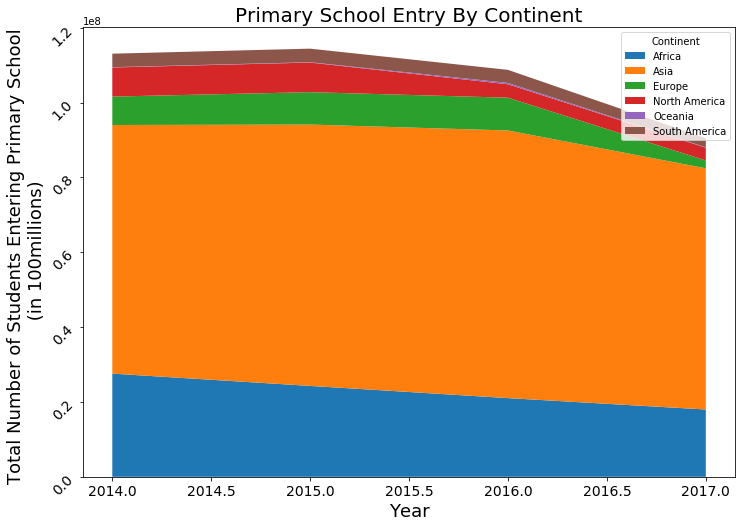

In [5]:
# data
x = list(total_entry_by_continent.reset_index().Time.unique())
y = list()
for c in total_entry_by_continent.Continent.unique():
    val = list(total_entry_by_continent[total_entry_by_continent.Continent == c].Total.values)
    y.append(val)
    
# plot
plt.stackplot(x,y, labels=list(total_entry_by_continent.Continent.unique()))
plt.legend(loc='best')

# size 
plt.gcf().set_size_inches(11.7, 8.27)

# title
plt.title(f'Primary School Entry By Continent',fontsize=20)

#axis
plt.ylabel('Total Number of Students Entering Primary School \n (in 100millions)', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.tick_params(axis='y', labelrotation=45)
plt.tick_params(labelsize=14)

#legend
plt.legend(title='Continent')

# plt.show()
plt.savefig('StackArea')    